In [46]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt


In [47]:
# Mercy codes starts here
#practice branching


In [48]:
# Mercy codes ends here

In [49]:
# Ash codes starts here

#Ash just adding some notes
print("Ash starts here")
#Note 1
#Note 2
#Note 3

Ash starts here


In [50]:

#These four files are the same they contain year - just append them into a dataframe
path = r'./Resources/' # use your path

all_files = glob.glob(path + "/*_Quality_*.csv")

all_files
li = []

for filename in all_files:

     df = pd.read_csv(filename, index_col=None, header=0)

     li.append(df)

QOL_df = pd.concat(li, axis=0, ignore_index=True)

#Bring in suicide file
suicide_rates_df = pd.read_csv(path + "suicide-death-rates-by-sex.csv")


#rename entity column to country
suicide_rates_df = suicide_rates_df.rename(columns={"Entity":"Country"})


#Inner join Suicide_rates_df with frame
combined_QOF_df = pd.merge(suicide_rates_df, QOL_df, how='inner', on=['Country', 'Year'])

combined_QOF_df  #This data frame should have everything we need to do analysis.

#frame view fram make sure its ok. you can output file on a mac with command below to view in excel
#Output file to see what output looks like
#combined_QOF_df.to_csv(r'c:\Users\Ashwin Patel\Desktop\export_226dataframe.csv')
#QOL_df.to_csv(r'c:\Users\Ashwin Patel\Desktop\export_227dataframe.csv')



,Country,Code,Year,"Female (deaths per 100,000)","Male (deaths per 100,000)","Both sexes (deaths per 100,000)",Rank,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,Argentina,ARG,2013,4.14,18.70,11.074010,45,72.53,51.09,40.71,78.26,69.68,10.19,46.71,55.56,-
1,Argentina,ARG,2014,4.07,18.25,10.820289,41,81.12,57.08,42.52,76.75,66.85,8.95,45.00,57.45,-
2,Argentina,ARG,2015,4.01,17.82,10.570321,52,77.01,59.38,37.60,75.18,67.12,11.59,41.39,55.88,-
3,Argentina,ARG,2016,4.00,17.95,10.627446,36,138.48,74.92,36.72,73.73,64.09,12.22,42.36,58.46,91.7
4,Armenia,ARM,2015,3.42,14.56,8.522066,60,49.07,27.74,70.86,48.33,40.68,13.39,26.09,73.03,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Uruguay,URY,2015,6.88,28.87,17.119112,42,93.06,44.87,52.83,67.92,68.55,11.23,45.00,31.72,-
265,Venezuela,VEN,2013,2.09,14.94,8.394513,67,-48.27,18.71,14.30,44.44,110.55,20.78,38.75,81.89,-
266,Venezuela,VEN,2014,2.09,15.06,8.445635,68,-39.32,17.87,18.50,41.05,114.36,20.19,38.75,73.96,-
267,Venezuela,VEN,2015,2.07,15.24,8.524199,86,-53.04,11.90,15.93,38.52,111.01,22.23,30.60,79.19,-


In [51]:
# Pick top 17 countries for analysis  and bottom 17 countries for analysis- What we will do is sum Both Sexes death rate and then pick the countries with the 5 highest
#rates over 5 year

In [52]:
#combined_QOF_df_top5 = combined_QOF_df.groupby(['Country'])['Both sexes (deaths per 100,000)'].agg('sum')
combined_QOF_df2 = combined_QOF_df.groupby(['Country'])['Both sexes (deaths per 100,000)'].sum().reset_index()
#Sort not really need nice to have to see all values.
#combined_QOF_df_top17 = combined_QOF_df_top5.sort_values(by=['Both sexes (deaths per 100,000)'], ascending=False)

combined_QOF_df_top17 = combined_QOF_df2.nlargest(17, ['Both sexes (deaths per 100,000)']) 
combined_QOF_df_top17['Category'] = "Top"
combined_QOF_df_bot17 = combined_QOF_df2.nsmallest(17, ['Both sexes (deaths per 100,000)']) 
combined_QOF_df_bot17['Category'] = "Bottom"

#Merge both top 
combined_QOF_df_All17 = combined_QOF_df_top17.append(combined_QOF_df_bot17, ignore_index=True)

combined_QOF_df_All17 = combined_QOF_df_All17.rename(columns={"Both sexes (deaths per 100,000)":"Summed"})

# #Merge this data set with combined_QOF_df to get data for all five countries only
Merge_Data_df = pd.merge(combined_QOF_df_All17 , combined_QOF_df , on="Country")
Merge_Data_df = Merge_Data_df.loc[Merge_Data_df['Year'] == 2015]
# Limit dataset to just the few columns we need
Final_df = Merge_Data_df[["Country", "Category","Both sexes (deaths per 100,000)", "Pollution Index"]]
Final_df


,Country,Category,"Both sexes (deaths per 100,000)",Pollution Index
2,Lithuania,Top,29.417319,29.60
6,Russia,Top,26.624484,72.77
10,Ukraine,Top,28.421395,69.85
14,South Korea,Top,22.389016,77.11
18,Japan,Top,15.692823,38.22
22,India,Top,15.705221,77.72
26,Hungary,Top,16.211493,46.25
30,Belgium,Top,14.909187,53.84
34,Poland,Top,14.514068,50.55
38,Slovenia,Top,14.617221,31.45


Text(0, 0.5, 'Pollution Index')

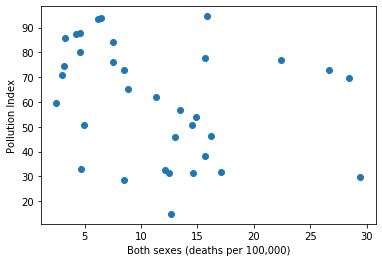

In [63]:
plt.scatter(Final_df['Both sexes (deaths per 100,000)'], Final_df['Pollution Index'])

plt.xlabel('Both sexes (deaths per 100,000)')
plt.ylabel('Pollution Index')

In [ ]:
#Ash ends here

In [ ]:
# Onome codes starts here

In [ ]:
# Take in all of Quality of Life data and read it into pandas

quality_of_life_2013 = "./Resources/2013_Quality_of_life_data.csv"
quality_of_life_2014 = "./Resources/2014_Quality_of_life_data.csv"
quality_of_life_2015 = "./Resources/2015_Quality_of_life_data.csv"
quality_of_life_2016 = "./Resources/2016_Quality_of_life_data.csv"
suicide_rates = "./Resources/suicide-death-rates-by-sex.csv"

quality_of_life_2013_df = pd.read_csv(quality_of_life_2013)
quality_of_life_2014_df = pd.read_csv(quality_of_life_2014)
quality_of_life_2015_df = pd.read_csv(quality_of_life_2015)
quality_of_life_2016_df = pd.read_csv(quality_of_life_2016)
suicide_rates_df = pd.read_csv(suicide_rates)

suicide_rates_df

In [ ]:
# Merge the first two datasets on "quality of life" 
combined_QOF_df = pd.merge(quality_of_life_2013_df, quality_of_life_2014_df, on='Country')


# Rename our _x columns to have year appened to each column name
combined_QOF_df = combined_QOF_df.rename(columns={"Rank_x":"2013 Rank",
                                                  "Year_x":"Year 2013",
                                                  "Quality of Life Index_x":"2013 Quality of Life Index",
                                                  "Purchasing Power Index_x":"2013 Purchasing Power Index",
                                                  "Safety Index_x":"2013 Safety Index",
                                                  "Health Care Index_x":"2013 Health Care Index",
                                                  "Cost of Living Index_x":"2013 Cost of Living Index",
                                                  "Property Price to Income Ratio_x":"2013 Property Price to Income Ratio",
                                                  "Traffic Commute Time Index_x":"2013 Traffic Commute Time Index",
                                                  "Pollution Index_x":"2013 Pollution Index",
                                                  "Climate Index_x":"2013 Climate Index"
                                                 })


# Rename our _y columns to have year appened to each column name
combined_QOF_df = combined_QOF_df.rename(columns={"Rank_y":"2014 Rank",
                                                  "Year_y":"Year 2014",
                                                  "Quality of Life Index_y":"2014 Quality of Life Index",
                                                  "Purchasing Power Index_y":"2014 Purchasing Power Index",
                                                  "Safety Index_y":"2014 Safety Index",
                                                  "Health Care Index_y":"2014 Health Care Index",
                                                  "Cost of Living Index_y":"2014 Cost of Living Index",
                                                  "Property Price to Income Ratio_y":"2014 Property Price to Income Ratio",
                                                  "Traffic Commute Time Index_y":"2014 Traffic Commute Time Index",
                                                  "Pollution Index_y":"2014 Pollution Index",
                                                  "Climate Index_y":"2014 Climate Index"
                                                 })

combined_QOF_df



In [ ]:
# Merge our newly combined dataframe with the 2015 dataframe
combined_QOF_df = pd.merge(combined_QOF_df, quality_of_life_2015_df, on="Country")

combined_QOF_df = combined_QOF_df.rename(columns={"Rank":"2015 Rank",
                                                  "Year":"Year 2015",
                                                  "Quality of Life Index":"2015 Quality of Life Index",
                                                  "Purchasing Power Index":"2015 Purchasing Power Index",
                                                  "Safety Index":"2015 Safety Index",
                                                  "Health Care Index":"2015 Health Care Index",
                                                  "Cost of Living Index":"2015 Cost of Living Index",
                                                  "Property Price to Income Ratio":"2015 Property Price to Income Ratio",
                                                  "Traffic Commute Time Index":"2015 Traffic Commute Time Index",
                                                  "Pollution Index":"2015 Pollution Index",
                                                  "Climate Index":"2015 Climate Index"
                                                 })

combined_QOF_df

In [ ]:
# Merge our newly combined dataframe with the 2016 dataframe


combined_QOF_df = pd.merge(combined_QOF_df, quality_of_life_2016_df, on="Country")

combined_QOF_df = combined_QOF_df.rename(columns={"Rank":"2016 Rank",
                                                  "Year":"Year 2016",
                                                  "Quality of Life Index":"2016 Quality of Life Index",
                                                  "Purchasing Power Index":"2016 Purchasing Power Index",
                                                  "Safety Index":"2016 Safety Index",
                                                  "Health Care Index":"2016 Health Care Index",
                                                  "Cost of Living Index":"2016 Cost of Living Index",
                                                  "Property Price to Income Ratio":"2016 Property Price to Income Ratio",
                                                  "Traffic Commute Time Index":"2016 Traffic Commute Time Index",
                                                   "Pollution Index":"2016 Pollution Index",
                                                  "Climate Index":"2016 Climate Index"
                                                 })

combined_QOF_df

In [ ]:
# Rename column Entity to Country
suicide_rates_df = suicide_rates_df.rename(columns={"Entity":"Country"})

# Merge our newly combined dataframe with the 2016 dataframe
combined_QOF_df = pd.merge(combined_QOF_df, suicide_rates_df, on="Country")
combined_QOF_df


In [ ]:
# Onome codes ends here

In [ ]:
# Stacey starts here
#Hi it's me I finally did it!


In [ ]:
#Stacey ends here
